## Last Name: Paithankar
## First Name: Sharvita 

# CSCI 4580/5580 - Data Science – Fall 2020
## Assignment 2: Text Analysis, Entity Resolution, and NLP

#### **Name**: Sharvita Paithankar

#### **Student ID**: 108172438

### Deliverables
Complete all the exercises below and turn in a write up in the form of a Jupyuter notebook, that is, **an .ipynb file**.
The write up should include your code, answers to exercise questions, and plots of results.
The submission will be as an assignment on Canvas with this file (after your edits) as an attachment. 

You have to use this notebook and fill in answers inline.
Don't forget to include answers to questions that ask for natural language responses, i.e., in English, not code!

Please do not add or remove any cells (you can add cells while doing the homework but remove them before submission).

### Need Help? 
In case you need help with this assignment, please ask your questions on the designated channel for Assignment 2 on Microsoft Teams. This way, you may receive assistance from the TA’s or your classmates (<b>DO NOT share your solution</b>) [Recommended]. 
<br/>If you need to include your solution in your question, please create a new chat with <b>all the TA’s</b> (in the new chat, add all the TA’s rather than sending your question to the TA’s separately).


### Collaboration
This assignment is to be done individually. Everyone should be getting a hands on experience in this course. You are free to discuss course material with fellow students, and we encourage you to use Internet resources to aid your understanding, but the work you turn in, including all code and answers, must be your own work.

Let's Get Started!
===

## Overview

Entity resolution is a common, yet difficult problem in data cleaning and integration.
In this assignment, we will use powerful and scalable text analysis techniques to perform entity resolution across two data sets of commercial products.

### Entity Resolution

Entity resolution, also known as record deduplication, is the process of identifying rows in one or more data sets that refer to the same real world entity.
Take an example.
You're on ebay looking for a [hip data science accessory][sliderulewiki], but you're on a budget, so you decide to scrape the [ebay listings][ebay] for a few days to get a feel for the market.
Unfortunately, the listings are confusing and you don't know how to aggregate them.
Entity resolution to the rescue!
You find an [authoritative database][sliderules] and map all the ebay listings to it.
Now you can comparison shop, get that sweet Keuffel and Esser for way cheap, and impress all the data hipsters.

But finding matching records is a hard problem in general.
A major reason is that the criteria for identifying duplicates are often vague and impossible to encode in rules.
In addition, from a purely computational perspective, the problem is quadratic in the size of its inputs: naively, all pairs of records need to be compared to find all the duplicates.
In this assignment, we will begin to address both these challenges.

[sliderulewiki]: http://en.wikipedia.org/wiki/Slide_rule "Only 2X faster than Hadoop"

[sliderules]: http://www.sliderule.ca/ "Artisanal Data Technology"

[ebay]: http://www.ebay.com/sch/i.html?_odkw=keuffel+esser+slide+rule&_osacat=0&_trksid=p2045573.m570.l1313.TR0.TRC0.Xslide+rule&_nkw=slide+rule&_sacat=0&_from=R40 "Impress your colleagues"


### Application

Your assignment is to perform entity resolution over two web-scraped data sets of commercial product listings, one from Amazon, and one from Google.
The goal is to build a unified database of all products listed on the Internet: a one-stop-shop for all your shopping needs.  (Elevator pitch: *it's like **Kayak.com** for **e-commerce**!*)

The web has made unprecedented amounts of data available publicly, but scraped data frequently needs to be de-duplicated.
These data sets are typical examples of what you can collect with some simple scripting.
The data is not especially large (just a few thousand records), but even so, you will find that entity resolution is a major challenge (top results with this data are ~50% success rate).
Don't get discouraged; the goal is to get acquainted with techniques to tackle the problem, and apply them to a representative example.

### Files

Data files for this assignment can be in the Data.zip file available on Canvas.

The zip file includes the following files:

* **Google_small.csv**, 200 records sampled from the Google data
* **Amazon_small.csv**, 200 records sampled from the Amazon data
* **Amazon_Google_perfectMapping.csv**, the "gold standard" mapping of duplicates
* **stopwords.txt**, a list of common English words

Besides the complete data files, there are "sample" data files for each data set.
Use these for **Part 1**.
In addition, there is a "gold standard" file that contains all of the true mappings between duplicate entities in the two data sets.
Every row in the gold standard file has a pair of record IDs (one Google, one Amazon) that belong to two record that describe the same thing in the real world.
We will use the gold standard to evaluate our algorithms.

### Deliverables

Complete all the exercises below and turn in a write up in the form of an IPython notebook, that is, **an .ipynb file**.
The write up should include your code, answers to exercise questions, and plots of results.
Submit your notebook on Canvas under A2. 

You must use this notebook and fill in answers inline.
In this notebook, we provide code templates for many of the exercises.
They are intended to help with code re-use, since the exercises build on each other, and are highly recommended.
Don't forget to include answers to questions that ask for natural language responses, i.e., in English, not code!

We will test your code automatically, so in your submitted notebook function names must conform the names requested by the questions and that can be executed with "Cell > Run all".

## Part 0: Preliminaries
Download the data from Canvas and uncompress/unarchive it.
Read each file in from the file system, and store them in Pandas DataFrames.

For each of the data files ("Google_small.csv", "Amazon_small.csv"), we want to parse the IDs out of each record.
The IDs are the first column of the file (they are URLs for Google, and alphanumeric strings for Amazon).


In [175]:
import pandas as pd
import numpy as np
import nltk
import glob
import csv
import re

#### Q1 [5 Points]
The two files we will use for this section can be found in the 'Data.zip' file you downloaded from Canvas.
* Amazon_small.csv
* Google_small.csv

Each file will contain the columns `id`,`name`,`description`,`manufacturer`, and `price` in this order.

**Q1.a -** Download the data and read each of the below files into a Pandas Dataframe. The `amazon_small` variable is shown as an example.

**Q1.b -** Set the `id` column as the index of the Dataframe for all of the files. For the "Amazon" file, the values in the `id` column are usable as-is. However, the Google file has URLs in the `id` column, which are clumsy to use as ids. Strip out the id number (the number at the end of the URL) for each value in the `id` column in the Google file and use these id numbers as the index.

In [176]:
# TODO: Q1.a
amazon_small = pd.read_csv("Amazon_small.csv",encoding="latin-1",dtype=str,quotechar='"',keep_default_na=False)
google_small = pd.read_csv("Google_small.csv",encoding="latin-1",dtype=str,quotechar='"',keep_default_na=False)

**TIP:** The rsplit function splits a string into a list of string using a specified delimiter. `rsplit` starts at the end of the string, `split` starts at the front. The `maxsplit` parameter controls how many splits are performed.

**Bonus TIP:** We recommend creating a function (or using a lambda), then using the Dataframe `apply` function to apply your function over the `id` column.

In [177]:
# Example of splitting a fake URL using rsplit
my_fake_url = "http://mylegitmate.biz/files/2020/2053942"
my_fake_url_split = my_fake_url.rsplit("/",maxsplit=1)
print(my_fake_url_split)
# Last element in the list is the ID we want.
print(my_fake_url_split[-1])

['http://mylegitmate.biz/files/2020', '2053942']
2053942


In [178]:
# TODO: Q1.b
# TODO: Set the index of amazon_small to be the "id" column
#amazon_small = <your code here>
amazon_small.set_index('id')

# TODO: Transform the id columns of the google dataset to strip out the URL
#google_small["id"] = <your code here>
google_small['id'] = [i.rsplit("/",maxsplit=1)[-1] for i in google_small['id']]

# TODO: Set the index of the google datasets to be the "id" column
#google_small = <your code here>
google_small.set_index('id')

,title,description,manufacturer,price
id,,,,
11448761432933644608,spanish vocabulary builder,expand your vocabulary! contains fun lessons t...,,6.95
8175198959985911471,topics presents: museums of world,5 cd-rom set. step behind the velvet rope to e...,,12.9
18445827127704822533,sierrahome hse hallmark card studio special ed...,hallmark card studio special edition (win 98 m...,sierrahome,19.26
18274317756231697680,adobe cs3 production premium academic,system requirements multicore intel processor ...,,569.99
18409551702230917208,equisys premium support zetafax 2007 - technic...,equisys premium support - zetafax 2007 upgrade...,,286.2
...,...,...,...,...
13695802285127612231,adobe flash cs3 professional - complete packag...,flash cs3 professional software is the most ad...,,229
18428018889032699615,viva media llc 00257 - my sim aquarium - win 2...,viva media llc 00257 : my sim aquarium is a vi...,,19.97
17010841797296818807,movies on psp,xoom movies on psp enables you to quickly conv...,,15.9


Since all of the columns are Series containing strings, we can use the `+` operator to combine the columns together, creating a new column that is the string concatenation of the `name`, `description`, and `manufacturer` columns. This means we only need to tokenize one string per row/entry.

In [179]:
def concat_columns(series):
    return " ".join([series.title,series.description,series.manufacturer])

amazon_small["all_text"] = amazon_small.apply(concat_columns,axis=1)
google_small["all_text"] = google_small.apply(concat_columns,axis=1)

## Part 1: ER using Text Similarity

A simple approach to entity resolution is to treat all records as strings and compute their similarity with a string distance function.
In this section, we will build some components for bag-of-words text-analysis, and use them to compute record similarity.

### 1.1 Bags of Words

Bag-of-words is a conceptually simple yet powerful approach to text analysis.
The idea is to treat strings, a.k.a. **documents**, as *unordered collections* of words, or **tokens**, i.e., as bags of words.

> **Note on terminology**: "token" is more general than what we ordinarily mean by "word" and includes things like numbers, acronyms, and other exotica like word-roots and fixed-length character strings.
> Bag of words techniques all apply to any sort of token, so when we say "bag-of-words" we really mean "bag-of-tokens," strictly speaking.

Tokens become the atomic unit of text comparison.
If we want to compare two documents, we count how many tokens they share in common.
If we want to search for documents with keyword queries (this is what Google does), then we turn the keywords into tokens and find documents that contain them.

The power of this approach is that it makes string comparisons insensitive to small differences that probably do not affect meaning much, for example, punctuation and word order.



In [180]:
from nltk.tokenize import regexp_tokenize
quickbrownfox = "A quick brown fox jumps over the lazy dog."
split_regex = r'[a-zA-Z_]+'

#### Q2 [5 points]

Implement the function `simple_tokenize(string)` that takes a string and returns a list of tokens in the string. `simple_tokenize` should split strings using the provided regular expression, and **convert the strings to lowercase**. 


**Tip:**
*The NLTK toolkit provides many functions for tokenizing words, some of which use special pre-trained models. For this question, you may use the `regexp_tokenize` function, which splits a string based on a given regular expression. You may also use python's built-in `re` library to match the regular expression if you wish.* `regexp_tokenize` will split the string, but you must perform the lowercase conversion yourself.

In [181]:
# TODO Implement this function
def simple_tokenize(string):
    tokens = re.findall(split_regex,string)
    processed_tokens = [x.lower() for x in tokens if x != '']
    return processed_tokens
    #pass

print(simple_tokenize(quickbrownfox)) # Should give ['a', 'quick', 'brown', ... ]
# Simple testcases
assert(simple_tokenize(" ") == [])
assert(simple_tokenize(quickbrownfox) == ['a','quick','brown','fox','jumps','over','the','lazy','dog'])

['a', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


#### Q3 [5 points]
Give an interpretation of what the regular expression `split_regex` is doing.

It is splitting a regular expression and basically tokanizes expressions. The input is a container that will be searched and the output is a container that holds copies of teh refrences to the substrings. 


#### Q4 [10 points]

Stopwords are common words that do not contribute much to the content or meaning of a document (e.g., "the", "a", "is", "to", etc.). Stopwords add noise to bag-of-words comparisons, so the are usually excluded. 

Using the included file "stopwords.txt", implement tokenize, an improved tokenizer that does not emit stopwords.

You may use a method of your choosing to read in the "stopwords.txt" file (Suggested methods are Pandas `read_csv` and Python's `csv` library).

**TIP:** *We recommend converting the list of stop words to a python `set` so that you can easily test membership using the `in` operator (i.e. `x in y` returns `True` if `x` is a member of set `y`).*

In [182]:
stopwords = []
with open("stopwords.txt") as f:
    reader = csv.reader(f)
    for row in reader:
        stopwords += (row)

# TODO Implement this function
def tokenize(string):
    tokens = re.findall(split_regex, string)
    processed_tokens = [x.lower() for x in tokens if x != "" and x.lower() not in stopwords]
    return processed_tokens
    
print(tokenize(quickbrownfox)) # Should give ['quick', 'brown', ... ]

assert(tokenize("Why a the?") == [])
assert(tokenize(quickbrownfox) == ['quick','brown','fox','jumps','lazy','dog'])

['quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


### 1.2 Weighted Bag-of-Words: TF-IDF

Bag-of-words comparisons are not very good when all tokens are treated the same: some tokens are more important than others.
Weights give us a way to specify which tokens to favor.
With weights, when we compare documents, instead of counting common tokens, we sum up the weights of common tokens.

A good heuristic for assigning weights is called "Term-Frequency/Inverse-Document-Frequency," or TF-IDF for short.

#### TF

TF rewards tokens that appear more in the same document.
It is computed as the frequency of a token in a document, that is, if token `t` appears 5 times in document `d` then the TF of `t` in `d` is `5`. The intuition for TF is that if a word occurs often in a document, then it is more important to the meaning of the document.

#### IDF

IDF rewards tokens that are rare across the documents in a data set.
The intuition is that it is more significant if two documents share a rare word than a common one.
IDF weight for a token, *t*, in a set of documents, *U*, is computed as follows: 

* Let *N* be the total number of documents in *U*
* Find *n(t)*, the number of documents in *U* that contain *t*
* Then *IDF(t) = log(N/(1+n(t)))*.

Note we are actually using the log of the inverse document frequency, which typically works better than the raw inverse frequency. But the terminology "IDF" still applies.

#### TF-IDF

Finally, to bring it all together, the total TF-IDF weight for a token in a document is the product of its TF and IDF weights.

In this section, we will use the `TfidfVectorizer` class provided by `scikit-learn` to generate TF-IDF vectors for each of the records in both the Amazon and Google datasets. Each record $i$ will be represented by a vector of $N$ weights,
$$ x_i = [w_0,w_1,...,w_N] $$
where $N$ is the number of words in the vocabulary set. 

For example, $w_0$ represents the TF-IDF weight of the first word in the vocabulary for this document.

First, we need choose a vocabulary for our vectors. This vocabulary should contain all of the unique words from both the Amazon and Google datasets.

In [183]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

In [184]:
all_amazon_words = amazon_small["all_text"].apply(tokenize).sum()
all_google_words = google_small["all_text"].apply(tokenize).sum()

In [185]:
print("Total Amazon Tokens: %d" % len(all_amazon_words))
print("Total Google Tokens: %d" % len(all_google_words))

Total Amazon Tokens: 16047
Total Google Tokens: 5360


#### Q5 [10 Points]

The two lists `all_amazon_words` and `all_google_words` are raw lists of tokens in each of the two datasets. 
Create a single python `set` called `vocab` that is the set of unique words from both lists with counts greater than 2 (i.e., if the word appears 2 or more times across both datsets, include it in the vocabulary).

In [186]:
# TODO: Create a single set() vocabulary that contains the unique words in both datasets.
#vocab = <your code here>
# Your set should contain 2563 unique words.

counts = Counter(all_amazon_words+ all_google_words)
vocab = [i for i in counts if counts[i]>1]

print(vocab)
print(len(vocab))
assert(len(vocab) == 2563)

['clickart', 'premier', 'image', 'pack', 'dvd', 'rom', 'broderbund', 'ca', 'international', 'arcserve', 'lap', 'desktop', 'oem', 'pk', 'backup', 'v', 'win', 'u', 'laptops', 'desktops', 'computer', 'associates', 'noah', 'ark', 'activity', 'center', 'jewel', 'case', 'ages', 'victory', 'multimedia', 'peachtree', 'sage', 'premium', 'accounting', 'nonprofits', 'affordable', 'easy', 'use', 'solution', 'provides', 'management', 're', 'like', 'nonprofit', 'organizations', 'constantly', 'striving', 'maximize', 'every', 'dollar', 'annual', 'operating', 'budget', 'financial', 'reporting', 'programs', 'advanced', 'operational', 'rock', 'solid', 'core', 'features', 'made', 'choice', 'hundreds', 'thousands', 'small', 'businesses', 'result', 'tailor', 'challenges', 'organization', 'keep', 'record', 'report', 'changes', 'transactions', 'improve', 'data', 'integrity', 'prior', 'period', 'locking', 'archive', 'snap', 'shots', 'year', 'set', 'individual', 'user', 'profiles', 'password', 'protection', 're

Now we will create the `TfidfVectorizer` object. We pass in three parameters:

- `analyzer=tokenize` - This passes the `tokenize` function you made previously as a custom parser for the data.
- `vocabulary=vocab` - This passes the `vocab` custom vocabulary set to the vectorizer.
- `norm="l2"` - This sets the sample normalization to `"l2"`. This is actually the default parameter setting, but we wanted you to notice that the `TfidfVectorizer` is doing this for you (it will be important soon).

In [187]:
tfidf_vec = TfidfVectorizer(analyzer=tokenize,vocabulary=vocab,norm="l2")

Now, we need to concatenate the two dataframes together, in order to fit the vectorizer on all of the data.

In [188]:
# Combine all data for model fitting. 
# NOTE: Amazon entries are the first 200 rows (0-199), Google entries are the next 200 rows (200-399)
all_data = pd.concat([amazon_small,google_small])
all_data_tfidf = tfidf_vec.fit_transform(all_data.all_text)
all_data_tfidf

<400x2563 sparse matrix of type '<class 'numpy.float64'>'
	with 12440 stored elements in Compressed Sparse Row format>

Verify that your `all_data_tfidf` says:
```
<400x2563 sparse matrix of type '<class 'numpy.float64'>'
	with 12440 stored elements in Compressed Sparse Row format>
    ```
The sparse matrix format is a space-efficient way to store large matrices when most entries are 0. The sparse matrix only stores values for non-zero entries.

The `tfidf_vec` object also has some information about the idf weights for each of our vocabulary words, stored in `tfidf_vecidf_`, as well as a mapping between vocabulary words and vector indices stored in `tfidf_vec.vocabulary_`.

#### Q6 [10 points]

**Q6.a -** Use the `.idf_` member of `tfidf_vec` to plot a histogram of the idf weights. This should be an interpretable chart (i.e. Give the chart a title and label both axes).

**Q6.b -** Use the `.idf_` and `.vocabulary_` members of `tfidf_vec` to generate a mapping between each vocabulary word and its IDF weight. Print the terms and weights for the **5 lowest** and **5 highest** IDF weights. Provide an interpretation of the meaning of these weights.

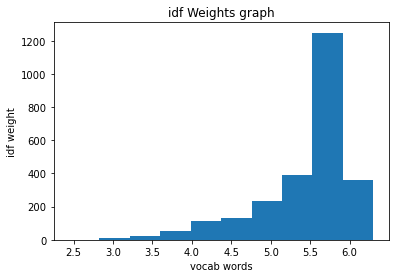

In [189]:
from matplotlib import pyplot as plt
# TODO: Q6.a - Plot a histogram of the IDF weights. Make sure to use a title and label your axes correctly
plt.title('idf Weights graph')
plt.xlabel('vocab words')
plt.ylabel('idf weight')
plt.hist(tfidf_vec.idf_, bins = 10)
plt.show()

In [190]:
# TODO: Q6.b - Print the terms and weights for the 5 lowest and 5 highest IDF terms.
# TODO: Provide an interpretation of the meaning of these weights.
import collections
tfidf_vec_sorted = dict(zip(tfidf_vec.get_feature_names(), tfidf_vec.idf_))
sorted_idf = sorted(tfidf_vec_sorted.items(), key = lambda x : x[1], reverse = False)
sorted_dictionary = collections.OrderedDict(sorted_idf)
idf_vals = pd.DataFrame(list(sorted_dictionary.items()),columns = ['Words','idf Weights'])

In [191]:
print("Top 5")
print(idf_vals.iloc[:5])
print("Bottom 5")
print(idf_vals.iloc[:-6:-1])

Top 5
      Words  idf Weights
0  software     2.440085
1  features     2.916424
2       new     2.916424
3       use     2.933518
4  complete     2.968610
Bottom 5
             Words  idf Weights
2562           llc     6.300814
2561     nightfall     6.300814
2560         guild     6.300814
2559  imagemanager     6.300814
2558   statistical     6.300814



### 1.3 Cosine Similarity

Now we are ready to do text comparisons in a formal way.
The metric of string distance we will use is called **cosine similarity**.
We will treat each document as a vector in some high dimensional space.
Then, to compare two documents we compute the cosine of the angle between their two document vectors.
This is easier than it sounds.

The first question to answer is how do we represent documents as vectors?
The answer is familiar: bag-of-words!
We treat each unique token as a dimension, and treat token weights as magnitudes in their respective token dimensions.
For example, suppose we use simple counts as weights, and we want to interpret the string "Hello, world!  Goodbye, world!" as a vector.
Then in the "hello" and "goodbye" dimensions the vector has value 1, in the "world" dimension it has value 2, and it is zero in all other dimensions.

Next question is: given two vectors how do we find the cosine of the angle between them?
Recall the formula for the dot product of two vectors:

$$a \cdot b = \| a \| \| b \| \cos \theta$$

Here $a \cdot b = \sum_{i=1}^n a_i b_i$ is the ordinary dot product of two vectors, and $\|a\| = \sqrt{ \sum_{i=1}^n a_i^2 }$ is the norm of $a$.

We can rearrange terms and solve for the cosine to find it is simply the normalized dot product of the vectors.
With our vector model, the dot product and norm computations are simple functions of the bag-of-words document representations, so we now have a formal way to compute similarity:

$$similarity = \cos \theta = \frac{a \cdot b}{\|a\| \|b\|} = \frac{\sum_{i=1}^n a_i b_i}{\sqrt{\sum_{i=1}^n a_i^2} \sqrt{\sum_{i=1}^n b_i^2}}$$

Setting aside the algebra, the geometric interpretation is more intuitive.
The angle between two document vectors is small if they share many tokens in common, because they are pointing in roughly the same direction.
Then, the cosine of the angle will be large.
Otherwise, if the angle is large (and they have few words in common), the cosine is small.
So the cosine scales proportionally with our intuitive sense of similarity.

#### Q7 [15 points]

Now that we understand cosine similarity, we can use it as a metric to determine the similarity between products in the Google and Amazon datasets.

The `all_data_tfidf` matrix contains the concatenated TF-IDF vector values for both the Amazon and Google datasets. 

Create two new variables `amazon_tfidf` and `google_tfidf` that contain only the TF-IDF vectors for the Amazon and Google data, respectively. You can perform slicing on the first dimension of `all_data_tfidf` to split the data.

Once you have `amazon_tfidf` and `google_tfidf`, calculate the pariwise cosine simialrity between the records in the two datasets. The output of this calculation should be a 200x200 matrix (200 rows in Amazon dataset x 200 rows in Google dataset). Note the formula for cosine similarity above. Store your result in a variable called `cosine_siml`.

**Note:** As mentioned previously, the vectors in `all_data_tfidf` are already L2 normalized, meaning $\| a \| \| b \| = 1$

In [192]:
# TODO: Q7
from sklearn.metrics.pairwise import cosine_similarity
amazon_tfidf = all_data_tfidf[0:200] 
google_tfidf = all_data_tfidf[200:]
cosine_siml = cosine_similarity(amazon_tfidf, google_tfidf) 

#### Q8 [5 points]
Plot a heatmap of the cosine similarity matrix. Give the chart a title and axes labes, but you do not need to label the rows/columns for indivdual records (it would be very messy). Include a colorbar to show the meaning of the color scale.

**Hint:** Pyplot's `imshow` function is great for visualizing 2D matrices.

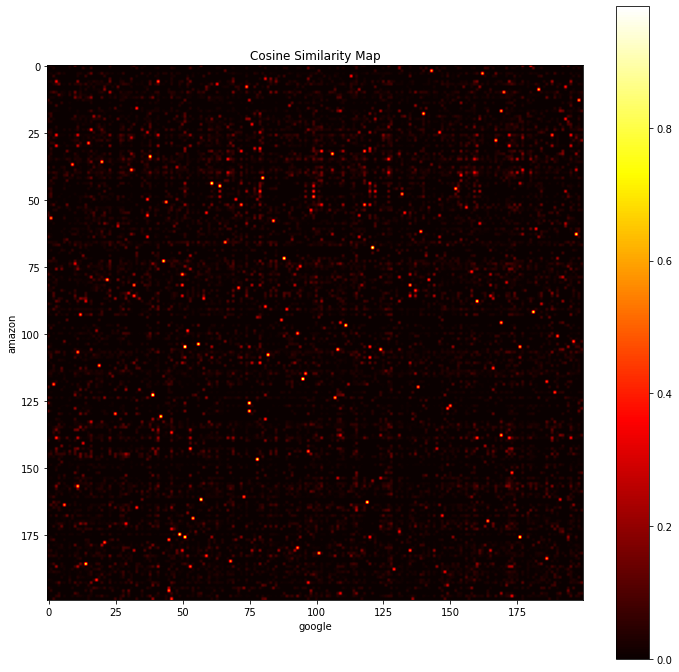

In [193]:
# TODO: Plot the heatmap here.
#import seaborn as sns
# import matplotlib.pylab as plt

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import colorbar
fig = plt.subplots(figsize = (12,12))
plt.imshow(cosine_siml, cmap ='hot')
plt.colorbar()
plt.title('Cosine Similarity Map')
plt.ylabel("amazon")
plt.xlabel('google')
plt.show()

#### Q9 [10 points]
Now we can finally do some entity resolution! Use the `cosine_siml` matrix to build a dictionary mapping `(Amazon Id, Google Id)` tuples to their cosine similarity scores between 0 and 1.


What is the similarity between Amazon record `b000o24l3q` and Google record `17242822440574356561` ?

In [242]:
# TODO Compute similarities
import numpy as np
import scipy
from sklearn.metrics.pairwise import cosine_similarity
similarities = {}
# matrix = cosine_siml.todense()
# matrix = np.array(matrix)

# amazon_id = amazon_small.index
# amazon_range= range(0,200)

# google_id = google_small.index
# google_range= range(0,200)

# for i in amazon_range:
#     x = amazon_id[i]
#     for j in google_range:
#         y= google_id[j]
#         z = (x,y)
#         similarities[z]= matrix[i][j]

for x in range(1, len(google_small)):
    for y in range(0, len(amazon_small)):
               google = google_small.iloc[x]
               amazon = amazon_small.iloc[y]
               similarities[(amazon.id, google.id)]= cosine_siml[y,x]

print('Requested similarity is %s.' % similarities[('b000o24l3q','17242822440574356561')])

Requested similarity is 0.011360947368056328.


#### Q10 [5 points]

Use the "gold standard" data (loaded from the supplied file `Amazon_Google_perfectMapping.csv`) to answer the following questions. How many true duplicate pairs are there in the small data sets? What is the average similarity score for true duplicates?  What about for non-duplicates?  Based on this, is cosine similarity doing a good job, qualitatively speaking, of identifying duplicates?  Why or why not?

In [207]:
# TODO: Q10
from sklearn.metrics.pairwise import cosine_similarity
gold_standard = pd.read_csv("Amazon_Google_perfectMapping.csv",encoding="latin-1",dtype=str,quotechar='"',keep_default_na=False)

# for amazon_id, amazon_val in amazon_tfidf.items():
#     for google_id, google_val in google_tfidf.items():
#         if (amazon_id, google_id) in gold_standard: #dup
#             true_dups += 1
#             total_sim_dups += cosine_similarity(amazon_val, google_val, idfs_small)
#         else: #non dup
#             false_dups += 1
#             total_sim_non += cosine_similarity(amazon_val, google_val, idfs_small)

# avg_sim_dups = total_sim_dups / true_dups # Fix me
# avg_sim_non = total_sim_non / false_dups # Fix me


#true_dups = 0.0 # Fix me
true_dups=pd.DataFrame(enumerate(gold_standard.idAmazon))
true_dups[true_dups[1].duplicated(keep=False)].groupby(1)[0].apply(list)

#avg_sim_dups = 0.0 # Fix me


#avg_sim_non = 0.0 # Fix me

print("There are %d true duplicates."% len(true_dups))
print("The average similarity of true duplicates is %f."% avg_sim_dups) 
print("And for non duplicates, it is %f."% avg_sim_non) 

There are 1300 true duplicates.


NameError: name 'avg_sim_dups' is not defined

## Part 2: NLP

Here we will use part of a dataset taken from Kaggle to train a sentiment analysis classifier, which is capable of predicting the positive or negative sentiment associated with a phrase. 

These data are snippets of movie reviews, which are labeled with overall sentiment of the snippet. The goal is to create a classifier which can predict the sentiment of a text sentence.

In [146]:
from nltk.sentiment import SentimentAnalyzer
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment.util import mark_negation,extract_unigram_feats

#### Q11 [5 points]

**Q11.a -** Read the `train_reviews.csv` and `test_reviews.csv` files in the Data.zip you downloaded from Canvas into two Pandas `Dataframe` objects called `train_df` and `test_df`. Print the first few rows of `train_df` using the `head` function (i.e. `train_df.head()`).

The sentiment labels are:

0. negative
1. somewhat negative

2. neutral

3. somewhat positive

4. positive

**Q11.b -** Plot a histogram of each value in the `Sentiment` column for the training and testing datasets. Which labels are the most common? Make sure to give each chart a title and label the axes. 

In [147]:
# TODO Q1.a
train_df = pd.read_csv('train_reviews.csv')
test_df =  pd.read_csv('test_reviews.csv')
train_df.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


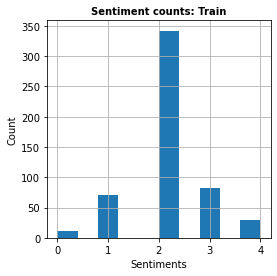

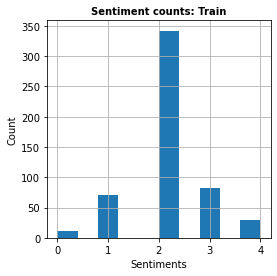

In [241]:
# Plot a histogram of the sentiment values for all sentences. 
table1 = train_df.hist(column = 'Sentiment', bins =10, figsize=(4,4))
table1 = table1[0]
for i in table1:
    i.set_xlabel('Sentiments')
    i.set_ylabel('Count')
    i.set_title('Sentiment counts: Train', weight ='bold', size=10)
    
table2 = train_df.hist(column = 'Sentiment', bins =10, figsize=(4,4))
table2 = table2[0]
for j in table2:
    j.set_xlabel('Sentiments')
    j.set_ylabel('Count')   
    j.set_title('Sentiment counts: Train', weight ='bold', size=10)


One important part of sentiment analysis is recognizing when words are negated. For example, take the sentence:
"I enjoy running"

In [149]:
my_sent = "I enjoy running"
my_opposite_sent = "I do not enjoy running"
print(tokenize(my_sent))
print(tokenize(my_opposite_sent))

['enjoy', 'running']
['enjoy', 'running']


If we tokenize these sentences with our `tokenize` function, these sentences become indistinguishable, since we lose the context of the "not" modifier. These sentences have identical tokenized representations even though their meanings are opposite.

We need a way to note when a word appears in a *negated* context, i.e. (**not** something *vs.* something). NLTK provides us a handy function called `mark_negation` that does exactly this.

Let's try it out on our sentences above, using the `simple_tokenize` function instead of `tokenize` so that we don't drop the "don't".

In [150]:
print(mark_negation(simple_tokenize(my_sent)))
print(mark_negation(simple_tokenize(my_opposite_sent)))

['i', 'enjoy', 'running']
['i', 'do', 'not', 'enjoy_NEG', 'running_NEG']


The `mark_negation` function correctly tagged the words "enjoy" and "running" with a `_NEG` suffix, to indicate that they are used in a negative context.

#### Q12 [5 points]
In both `train_df` and `test_df` the `Phrase` column holds a string which we need to tokenize. Thankfully, you have already created two tokenize functions in the previous part of this assignment! For this we do *not* want to remove stop words, so use `simple_tokenize`. 


**Q12.1 -** Create a new column called `tokens` in both `train_df` and `test_df` which contain the tokenized representation (i.e. a list of strings) for the `Phrase` column. Use the `mark_negation` function to ensure that negations are tagged correctly.

**Q12.2 -** Create a set called `unique_words` containing the unique words in the `tokens` column from both `train_df` and `test_df` (i.e. create a single set).

In [167]:
# TODO: Q12.1
train_df["tokens"] = train_df['Phrase'].apply(lambda x: mark_negation(simple_tokenize(x)))
test_df["tokens"] = test_df['Phrase'].apply(lambda x: mark_negation(simple_tokenize(x)))
train_df.head()

,PhraseId,SentenceId,Phrase,Sentiment,tokens
0,1,1,A series of escapades demonstrating the adage ...,1,"[a, series, of, escapades, demonstrating, the,..."
1,2,1,A series of escapades demonstrating the adage ...,2,"[a, series, of, escapades, demonstrating, the,..."
2,3,1,A series,2,"[a, series]"
3,4,1,A,2,[a]
4,5,1,series,2,[series]


Verify that your `tokens` column looks correct. (i.e., it should be a list of lowercase strings corresponding to the words in `Sentiment`)

In [230]:
# TODO: Q12.2
# Add all of the unique words in train_df
import pandas as pd
unique_words = set()
for token_group in train_df.tokens:
    unique_words.update(token_group)
# TODO: Do the same for test_df.
for token_group in test_df.tokens:
    unique_words.update(token_group)

In [231]:
# Should have 414 unique words
assert(len(unique_words) == 414)

Now we can create a `SentimentAnalyzer`, which is an NLTK helper class for building a sentiment analyzer.

In [232]:
analyzer = SentimentAnalyzer()

#### Q13 [5 points]
The sentiment analyzer that we will train expects to recieve each phrase as a tuple in the form of:
`(["a","series","of","tokens"],label)`

Build two variables `train_set` and `test_set` containing lists of tuples of the form shown above by combining the `tokens` and `Sentiment` columns from each dataframe.

`train_set`  and `test_set` should both look like a list of tuples containing the token list and label:
```
[
...
(['of',
  'escapades',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose'],2),
...
]
```

In [233]:
#TODO Q13
train_set = [(toks,lbl) for toks,lbl in zip(train_df.tokens,train_df.Sentiment)]
test_set = [(toks,lbl) for toks,lbl in zip(test_df.tokens,test_df.Sentiment)]

We can now use the `add_feature_extractor` function to create a feature extractor for our dataset. In this case, we will use `extract_unigram_feats`, which will provide a boolean indicator of whether each word in `unique_words` exists in the current sentence

In [234]:
analyzer.add_feat_extractor(extract_unigram_feats,unigrams=unique_words)

Now we can create two sets of features `train_features` and `test_features` for our training and testing data respectively.

In [235]:
train_features = analyzer.apply_features(train_set)
test_features = analyzer.apply_features(test_set)

We will learn more about using classifiers such as Naive Bayes in the next assignment. For now, let's just use the NaiveBayesClassifier to perform sentiment analysis.

This cell may take a few minutes to run while it is training the classifier.

In [236]:
nb_trainer = NaiveBayesClassifier.train
nb_classifier = analyzer.train(nb_trainer,train_features)

Training classifier


In [237]:
analyze_dict = analyzer.evaluate(test_features)

Evaluating NaiveBayesClassifier results...


In [229]:
from seaborn import color_palette
formatted_vals = {re.match("([a-zA-Z\-]+)(?:\s+\[(\d+)\])?",key).groups():[val] for key,val in analyze_dict.items()}
pretty_df = pd.DataFrame(formatted_vals).transpose().sort_index()
pretty_df.columns = ["Value"]
pretty_df.index.set_names(["Metric","Class"],inplace=True)
pretty_df.style.background_gradient(cmap="Greens")

#### Q14 [5 points]
Now that we have trained our classifier, we can evaluate it on our testing set.

Provide an interpretation of the class results as printed above. Does the classifier do well in general?
Which classes does the classifier have an easier time predicting? 

The class labels are:
0. negative
1. somewhat negative
2. neutral
3. somewhat positive
4. positive

It seems taht the classifier's accuracy is around 54%, which is not the best not the worst.If the classifier is trained more throughly(sets need to be bigger), the accuracy percent would be mich higher. We can see that the neutral class 2, has the best accuracy out of all of them for the F-measure, precision, and recall. F-measure, precision, and recall are more than 70 percent where as in other classes it is lower.

Done! Save and submit your notebook on Canvas!